## <b>[Home Credit - Credit Risk Model Stability]</b>
### Ⅰ. Given Data Information in Kaggle
#### 01\. Overview<br>
> 이 대회의 목표는 <b>대출을 제때 생환하지 못할 가능성이 높은 고객군을 예측하는 것</b>입니다. 시간이 지나도 안정적인 솔루션이 더 높이 평가받을 것입니다. 여러분의 참여로 소비자금융사들은 잠재 고객의 채무 불이행 위험을 보다 안정적·장기적으로 평가할 수 있게 됩니다.
> <details><summary>원문</summary>The goal of this competition is to predict which clients are more likely to default on their loans. The evaluation will favor solutions that are stable over time. Your participation may offer consumer finance providers a more reliable and longer-lasting way to assess a potential client’s default risk.</details><br>

#### 02\. Description
> 신용 기록이 없다는 것은 여러 가지<span style="font-size:16px;">(e.g. 나이 어림, 현금 선호 등)</span>를 의미할 수 있습니다. 신용 기록이 거의, 또는 전혀 없는 사람은 대출이 거절될 가능성이 높습니다. 소비자 금융 제공업체는 대출 상환이 가능한 고객과 불가능한 고객을 정확하게 판단해야 하며, 이를 위해서는 데이터가 핵심입니다. 만약 데이터 사이언스가 개인의 상환 능력을 보다 잘 예측하는 데 있어 도움이 된다면 대출의 혜택을 가장 많이 받을 수 있는 사람들이 더 쉽게 대출을 받을 수 있게 될 것입니다.<br><br>
현재 소비자금융사들은 다양한 통계적, 머신러닝 방법을 고객의 대출 리스크 예측에 활용하고 있습니다. 이러한 모델을 통칭 <b>'스코어카드<span style="font-size:16px;">(Scorecard)</span>'</b><span style="color:orange; font-size:16px;">(※ e.g. <a href="https://www.ibm.com/docs/ko/odm/8.5.1?topic=overview-introducing-rule-designer-scorecard-modeler">Rule Designer Scorecard Modeler 소개</a>)</span>라고 합니다. 스코어카드의 예측 성능 급락은 상환 가능성이 낮은 고객에게 대출이 제공될 가능성을 높일 수 있으므로 스코어카드의 미래 안정성은 매우 중요합니다. 따라서 수시로 업데이트되는 것이 가장 이상적이나 그 작업은 많은 시간과 비용을 소모하며 고객의 행동 양식도 시시각각 변하므로 현실적으로 어렵습니다. 문제의 핵심은 금융사가 대출의 첫 번째 만기일이 되기 전에 잠재적인 문제를 조기에 발견할 수 없다는 데 있습니다. 고로, 스코어카드 개발 시 성능 못지 않게 안정성도 고려해야 합니다. 모델의 안정성과 성능 사이에는 상충 관계가 있으므로 배포 전에 균형을 맞춰야 합니다.<br><br>
1997년에 설립된 대회 주최사 <b>Home Credit</b>은 주로 신용 기록이 거의, 또는 전혀 없는 사람들에게 책임감 있는 대출을 제공하는 국제 소비자 금융 제공업체입니다. Home Credit은 긍정적이고 안전한 대출 경험을 제공함으로써 은행 서비스를 이용하지 못하는 사람들을 위한 금융 포용성을 확대합니다. 이전에 Kaggle과 Competition을 개최한 적이 있는데, <a href="https://www.kaggle.com/competitions/home-credit-default-risk">여기</a>서 확인할 수 있습니다.<br><br>
잠재 고객의 채무 불이행 위험을 평가하는 데 도움을 주면 소비자 금융 제공업체는 더 많은 대출 신청을 수락할 수 있습니다. 이는 그동안 신용 기록이 부족하다는 이유로 대출을 거절당했던 사람들의 삶을 개선할 수 있습니다.<br>
> <details><summary>원문</summary>The absence of a credit history might mean a lot of things, including young age or a preference for cash. Without traditional data, someone with little to no credit history is likely to be denied. Consumer finance providers must accurately determine which clients can repay a loan and which cannot and data is key. If data science could help better predict one’s repayment capabilities, loans might become more accessible to those who may benefit from them the most.<br><br>Currently, consumer finance providers use various statistical and machine learning methods to predict loan risk. These models are generally called scorecards. In the real world, clients' behaviors change constantly, so every scorecard must be updated regularly, which takes time. The scorecard's stability in the future is critical, as a sudden drop in performance means that loans will be issued to worse clients on average. The core of the issue is that loan providers aren't able to spot potential problems any sooner than the first due dates of those loans are observable. Given the time it takes to redevelop, validate, and implement the scorecard, stability is highly desirable. There is a trade-off between the stability of the model and its performance, and a balance must be reached before deployment.<br><br>Founded in 1997, competition host Home Credit is an international consumer finance provider focusing on responsible lending primarily to people with little or no credit history. Home Credit broadens financial inclusion for the unbanked population by creating a positive and safe borrowing experience. We previously ran a competition with Kaggle that you can see <a href="https://www.kaggle.com/competitions/home-credit-default-risk">here</a>.<br><br>Your work in helping to assess potential clients' default risks will enable consumer finance providers to accept more loan applications. This may improve the lives of people who have historically been denied due to lack of credit history.</details><br>

#### 03\. Evaluation


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import polars as pl

from warnings import filterwarnings

pd.options.display.max_colwidth = None
pd.options.display.max_columns = None

pl.Config.set_fmt_str_lengths(9999)

filterwarnings("ignore")

df = pd.read_csv("Datas/feature_definitions.csv")
df

,Variable,Description
0,actualdpd_943P,Days Past Due (DPD) of previous contract (actual).
1,actualdpdtolerance_344P,DPD of client with tolerance.
2,addres_district_368M,District of the person's address.
3,addres_role_871L,Role of person's address.
4,addres_zip_823M,Zip code of the address.
...,...,...
460,totinstallast1m_4525188A,Total amount of monthly instalments paid in the previous month.
461,twobodfilling_608L,Type of application process.
462,type_25L,Contact type of a person.
463,typesuite_864L,Persons accompanying the client during the loan application process.


### Ⅱ. Data Exploration<br>

In [7]:
# DataFrame 정보 확인
def info_df(df):
    temp_df = pd.DataFrame()
    temp_df['col_name'] = df.columns
    temp_df['feat_group'] = temp_df['col_name'].str[-1]
    
    for i in range(len(df.columns)):
        x = df.iloc[:, i]
        temp_df.loc[i, 'data_type'] = x.dtype
        temp_df.loc[i, 'have_null'] = any(x.isna())
        temp_df.loc[i, 'null_count'] = x.isna().sum()
        temp_df.loc[i, 'null_ratio'] = x.isna().sum() / x.shape[0]
        temp_df.loc[i, 'nunique'] = x.nunique()
    return temp_df

#### 01\. applprev_2<br>

&nbsp;&nbsp;1\) Column별 내용<span style="font-size:16px;">(추정)</span><br>
&nbsp;(1) <b>cacccardblochreas_147M</b>: 카드 정지 사유<span style="font-size:16px" title="Card blocking reason">(원문)</span><br>
&nbsp;(2) <b>conts_type_509L</b>: 이전 대출 신청서에 작성된 고객의 연락처 정보<span style="font-size:16px" title="Person contact type in previous application">(원문)</span><br>
&nbsp;(3) <b>credacc_cards_status_52L</b>: 이전 신용 계좌의 카드 상태<span style="font-size:16px" title="Card status of the previous credit account">(원문)</span>

In [8]:
applprev_2 = pd.read_parquet("Datas/parquet_files/train/train_applprev_2.parquet")
applprev_2

,case_id,cacccardblochreas_147M,conts_type_509L,credacc_cards_status_52L,num_group1,num_group2
0,2,None,EMPLOYMENT_PHONE,None,1,1
1,2,None,EMPLOYMENT_PHONE,None,0,1
2,2,None,PRIMARY_MOBILE,None,0,0
3,2,None,PRIMARY_MOBILE,None,1,0
4,3,None,PRIMARY_MOBILE,None,0,1
...,...,...,...,...,...,...
14075482,2703454,a55475b1,PRIMARY_MOBILE,None,0,0
14075483,2703454,a55475b1,None,None,1,3
14075484,2703454,a55475b1,None,None,0,1
14075485,2703454,a55475b1,PRIMARY_MOBILE,None,1,0


&nbsp;&nbsp;2\) 파일 전체에서 관찰되는 특징<br>
&nbsp;(1) cacccardblochreas_147M 컬럼은 Masking된 데이터이며, 약 99.9% 이상의 데이터가 <b>a55475b1</b>을 가짐<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange;">→ 이걸 뺀 나머지 약 0.1% 확인 결과, 특이한 점은 못 찾음</span><br>
&nbsp;(2) 모든 주요 컬럼에 null 값이 존재하며, credacc_cards_status_52L 컬럼이 null 값 빈도가 가장 높음<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange;">→ credacc_cards_status_52L 컬럼의 non-null만 따로 빼서 확인 결과, 특이한 점은 못 찾음</span><br>
&nbsp;(3) cacccardblochreas_147M 컬럼은 고객의 상환 능력을 예측하는 데 도움이 될 것으로 생각됨<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange;">→ encoding을 진행할 수 있는가? 진행할 수 있다면 어떤 방법을 사용해야 하는가?</span><br>
&nbsp;(4) 각 Column별 null ratio 도식화<span style="font-size:16px;">(하단 셀 참조)</span>

In [4]:
applprev_2.info(memory_usage="deep", show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14075487 entries, 0 to 14075486
Data columns (total 6 columns):
 #   Column                    Non-Null Count     Dtype 
---  ------                    --------------     ----- 
 0   case_id                   14075487 non-null  int64 
 1   cacccardblochreas_147M    13966238 non-null  object
 2   conts_type_509L           11681431 non-null  object
 3   credacc_cards_status_52L  342083 non-null    object
 4   num_group1                14075487 non-null  int64 
 5   num_group2                14075487 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 2.3 GB


In [5]:
## cacccardblochreas_147M의 a55475b1 외 데이터 확인
applprev_2[applprev_2["cacccardblochreas_147M"] != "a55475b1"]

,case_id,cacccardblochreas_147M,conts_type_509L,credacc_cards_status_52L,num_group1,num_group2
0,2,None,EMPLOYMENT_PHONE,None,1,1
1,2,None,EMPLOYMENT_PHONE,None,0,1
2,2,None,PRIMARY_MOBILE,None,0,0
3,2,None,PRIMARY_MOBILE,None,1,0
4,3,None,PRIMARY_MOBILE,None,0,1
...,...,...,...,...,...,...
14071229,2703147,P201_63_60,PRIMARY_MOBILE,BLOCKED,0,0
14072539,2703249,P201_63_60,PRIMARY_MOBILE,BLOCKED,1,0
14073901,2703347,P33_145_161,PRIMARY_MOBILE,CANCELLED,3,0
14073905,2703347,P33_145_161,None,BLOCKED,3,1


In [6]:
## credacc_cards_status_52L 컬럼의 non-null 데이터 확인
applprev_2[~applprev_2["credacc_cards_status_52L"].isna()]

,case_id,cacccardblochreas_147M,conts_type_509L,credacc_cards_status_52L,num_group1,num_group2
71,38,None,PRIMARY_MOBILE,CANCELLED,0,0
1520,936,None,PHONE,CANCELLED,1,0
1668,1029,None,PRIMARY_MOBILE,CANCELLED,0,0
4049,2419,None,HOME_PHONE,CANCELLED,0,0
4365,2591,None,PRIMARY_MOBILE,INACTIVE,1,0
...,...,...,...,...,...,...
14075331,2703443,a55475b1,HOME_PHONE,ACTIVE,6,0
14075409,2703450,a55475b1,EMPLOYMENT_PHONE,INACTIVE,11,1
14075433,2703450,a55475b1,PRIMARY_MOBILE,CANCELLED,11,0
14075443,2703451,a55475b1,PRIMARY_MOBILE,ACTIVE,5,0


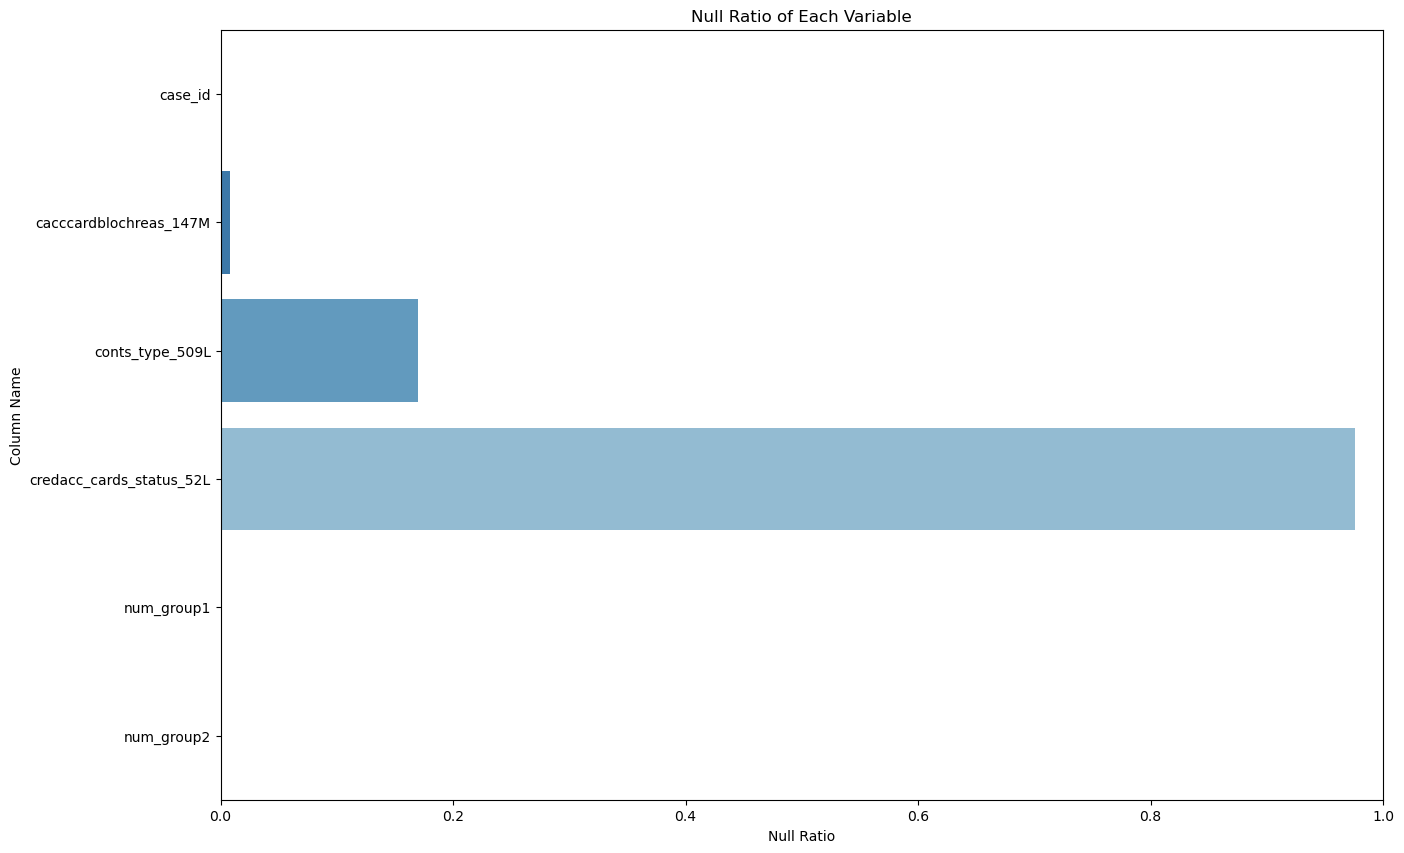

In [16]:
# 각 Column별 null ratio 도식화
plt.figure(figsize=(15, 10))
sns.barplot(x='null_ratio', y='col_name', data=info_df(applprev_2), palette='Blues_r')

# Set labels and title
plt.xlabel('Null Ratio')
plt.ylabel('Column Name')
plt.title('Null Ratio of Each Variable')
plt.xlim((0, 1))
plt.show()

3\) Column별로 관찰되는 특징

##### (1) <b>case_id</b>
&nbsp;&nbsp;&nbsp;- <b>데이터 타입<span style="font-size:16px;">(갯수)</span></b>: int64<span style="font-size:16px;">(14,075,487개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>최빈 데이터<span style="font-size:16px;">(갯수)</span></b>: 1246034 & 1390922<span style="font-size:16px;">(79회)</span><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange;">→ 신용거래가 잦은 사람과 그렇지 않은 사람의 차이가 있을까?</span><br>
&nbsp;&nbsp;&nbsp;- <b>결측치 여부</b>: X<br>
&nbsp;&nbsp;&nbsp;- <b>데이터의 분포 형태</b>: kdeplot 그려봤다가 폐기<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange;">→ merge 후 다른 옵션과 비교하면 훨씬 해석이 잘 될 것 같음</span><br>
&nbsp;&nbsp;&nbsp;- <b>고유 데이터 갯수</b>: 1,221,522명<br>
&nbsp;&nbsp;&nbsp;- <b>기타 논의/의문점</b>:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;① <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;② <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;③ 

In [7]:
# 데이터 타입(갯수)
x = applprev_2["case_id"]
x.dtype, x.count()

(dtype('int64'), 14075487)

In [8]:
# 최빈 데이터(갯수)
x.value_counts(ascending=False)

case_id
1246034    79
1390922    79
1344039    78
1585694    77
2647430    77
           ..
662100      1
662102      1
825269      1
662114      1
599064      1
Name: count, Length: 1221522, dtype: int64

In [9]:
# 결측치 여부
x.isna().value_counts()

case_id
False    14075487
Name: count, dtype: int64

In [10]:
# 고유 데이터 갯수
x.nunique()

1221522

##### (2) <b>cacccardblochreas_147M</b>: 카드 정지 사유<br>
&nbsp;&nbsp;&nbsp;- <b>데이터 타입<span style="font-size:16px;">(갯수)</span></b>: object<span style="font-size:16px;">(13,966,238개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>최빈 데이터<span style="font-size:16px;">(비율)</span></b>: a55475b1<span style="font-size:16px;">(약 99.9%)</span><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange;">→ Masking된 다른 컬럼에도 <b>a55475b1</b>가 매우 자주, 높은 비율로 등장함</span><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange;">→ <b>Null</b>, 또는 <b>0</b>을 의미하는 값으로 추정됨</span><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange;">→ 저는 이게 nominal이라 <b>Null</b>로 보이긴 합니당...</span><br>
&nbsp;&nbsp;&nbsp;- <b>결측치 비율</b>: 약 0.7%<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange;">→ 결측치만 따로 빼서 다른 컬럼을 봤는데 <b>별다른 특이점은 못 찾음</b></span><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange;">→ 다른 파일 교차 검증 시 <b>이들이 만약 한 번도 카드 정지나 연체를 당하지 않은 사람들</b>임이 드러나면 리스트에서 빼도 되지 않을까?</span><br>
&nbsp;&nbsp;&nbsp;- <b>고유 데이터 갯수</b>: 9가지<br>
&nbsp;&nbsp;&nbsp;- <b>기타 논의/의문점</b>:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;① 직불카드 정지의 주요 사유 중 하나가 통장 정지니 <b>a55475b1 외 데이터를 다른 파일에서 좀 살펴 보면 어떨까요?</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange;">→ 세세하게 따지면야 분실, 도난, 직접 요청 등등 있겠지만 그건 어차피 우리가 알 수 없으니까요</span><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;② 다른 파일에 <b>debit card<span style="font-size:16px;">(직불카드)</span></b>가 나왔으니, 이것도 debit card겠죠?<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;③ 

In [11]:
# 데이터 타입(갯수)
x = applprev_2["cacccardblochreas_147M"]
x.dtype, x.count()

(dtype('O'), 13966238)

In [12]:
# 최빈 데이터(비율)
x.value_counts(ascending=False, normalize=True)

cacccardblochreas_147M
a55475b1       0.999442
P33_145_161    0.000237
P201_63_60     0.000212
P19_60_110     0.000081
P23_105_103    0.000008
P133_119_56    0.000007
P41_107_150    0.000007
P17_56_144     0.000005
P127_74_114    0.000001
Name: proportion, dtype: float64

In [13]:
# 결측치 비율
x.isna().value_counts(normalize=True)

cacccardblochreas_147M
False    0.992238
True     0.007762
Name: proportion, dtype: float64

In [14]:
## 결측치 심층 탐색
test = applprev_2[applprev_2["cacccardblochreas_147M"].isnull()]
no_block = list(set(list(test.iloc[:, 0].values)))
len(no_block)

24469

In [15]:
# 고유 데이터 갯수
x.nunique()

9

##### (3) <b>conts_type_509L</b>: 이전 대출 신청서에 작성된 고객의 연락수단 정보<br>
&nbsp;&nbsp;&nbsp;- <b>데이터 타입<span style="font-size:16px;">(갯수)</span></b>: object<span style="font-size:16px;">(11,681,431개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>최빈 데이터<span style="font-size:16px;">(비율)</span></b>: PRIMARY_MOBILE<span style="font-size:16px;">(약 53.8%)</span><br>
&nbsp;&nbsp;&nbsp;- <b>결측치 비율</b>: 약 17.0%<br>
&nbsp;&nbsp;&nbsp;- <b>고유 데이터 갯수</b>: 9개<br>
&nbsp;&nbsp;&nbsp;- <b>기타 논의/의문점</b>:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;① drop을 쉽게 결정하면 안 되겠지만 아무리 봐도 이건 통째로 drop해도 될 것 같슴다<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;② 연락 수단 없이 application이 제출되었을 리는 없으니... 갱신계약? 단순 null?<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;③ 

In [16]:
# 데이터 타입(갯수)
x = applprev_2["conts_type_509L"]
x.dtype, x.count()

(dtype('O'), 11681431)

In [17]:
# 최빈 데이터(비율)
x.value_counts(ascending=False, normalize=True)

conts_type_509L
PRIMARY_MOBILE       5.388369e-01
HOME_PHONE           2.116333e-01
EMPLOYMENT_PHONE     1.437681e-01
PHONE                7.918191e-02
PRIMARY_EMAIL        2.201152e-02
ALTERNATIVE_PHONE    3.238730e-03
SECONDARY_MOBILE     1.327235e-03
WHATSAPP             2.140149e-06
SKYPE                1.712119e-07
Name: proportion, dtype: float64

In [18]:
# 결측치 비율
x.isna().value_counts(normalize=True)

conts_type_509L
False    0.829913
True     0.170087
Name: proportion, dtype: float64

In [19]:
# 고유 데이터 갯수
x.nunique()

9

##### (4) <b>credacc_cards_status_52L</b>: 이전 신용 계좌의 카드 상태<br>
&nbsp;&nbsp;&nbsp;- <b>데이터 타입<span style="font-size:16px;">(갯수)</span></b>: object<span style="font-size:16px;">(342,083개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>최빈 데이터<span style="font-size:16px;">(비율)</span></b>: CANCELLED<span style="font-size:16px;">(약 48.8%)</span><br>
&nbsp;&nbsp;&nbsp;- <b>데이터 비율<span style="font-size:16px;">(countplot)</span></b>: 하단 셀 참고<br>
&nbsp;&nbsp;&nbsp;- <b>결측치 비율</b>: 약 97.6%<br>
&nbsp;&nbsp;&nbsp;- <b>고유 데이터 갯수</b>: 6개<br>
&nbsp;&nbsp;&nbsp;- <b>기타 논의/의문점</b>:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;① 제 생각에 <b>CANCELLED=카드 발급 조건 미달로 발급 신청이 취소됨</b>, <b>BLOCKED=정지</b>로 보입니다. 맞을까요?<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;② BLOCKED인 case_id를 좀 더 살펴 보면 좋겠습니다.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;③ null이 너무 많으니 아예 drop하는 것도 방법일 듯?

In [20]:
# 데이터 타입(갯수)
x = applprev_2["credacc_cards_status_52L"]
x.dtype, x.count()

(dtype('O'), 342083)

In [21]:
# 최빈 데이터(비율)
x.value_counts(ascending=False, normalize=True)

credacc_cards_status_52L
CANCELLED      0.488276
ACTIVE         0.320513
INACTIVE       0.184072
BLOCKED        0.006133
RENEWED        0.000889
UNCONFIRMED    0.000117
Name: proportion, dtype: float64

<Axes: xlabel='credacc_cards_status_52L', ylabel='count'>

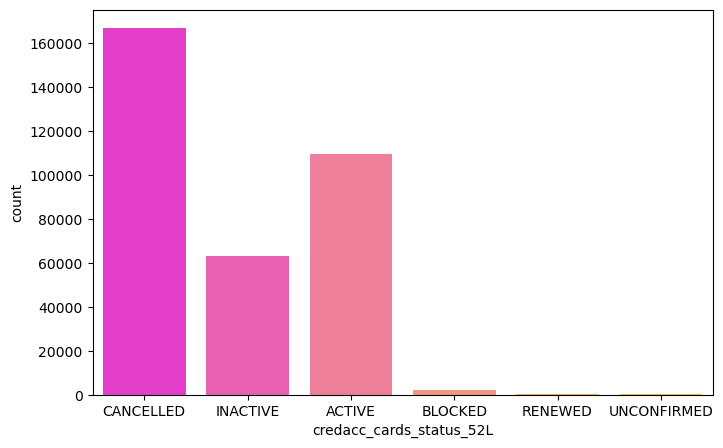

In [22]:
# 데이터 비율(countplot)
plt.figure(figsize=(8, 5))
sns.countplot(x=x, palette="spring")

In [23]:
# 결측치 비율
x.isna().value_counts(normalize=True)

credacc_cards_status_52L
True     0.975697
False    0.024303
Name: proportion, dtype: float64

In [24]:
# 고유 데이터 갯수
x.nunique()

6

#### 02\. credit_bureau_b_2<br>

&nbsp;&nbsp;1\) Column별 내용<span style="font-size:16px;">(추정)</span><br>
&nbsp;(1) <b>pmts_date_1107D</b>: 개인신용평가기관<span style="font-size:16px;">(CB)</span>에 따른 활성 계약의 결제일(num_group1 - contract, num_group2 - payment)<span style="font-size:16px" title="Payment date for an active contract according to credit bureau (num_group1 - contract, num_group2 - payment)">(원문)</span><br>
&nbsp;(2) <b>pmts_dpdvalue_108P</b>: 활성 계약에 대한 연체 금액(num_group1 - existing contract, num_group2 - payment)<span style="font-size:16px" title="Value of past due payment for active contract">(원문)</span><br>
&nbsp;(3) <b>pmts_pmtsoverdue_635A</b>: 연체가 존재하는 활성 계약<span style="font-size:16px" title="Active contract that has overdue payments (num_group1 - existing contract, num_group2 - payment)">(원문)</span>

In [25]:
credit_bureau_b_2 = pd.read_parquet("Datas/parquet_files/train/train_credit_bureau_b_2.parquet")
credit_bureau_b_2

,case_id,num_group1,num_group2,pmts_date_1107D,pmts_dpdvalue_108P,pmts_pmtsoverdue_635A
0,467,2,19,2018-05-15,0.0,0.0
1,467,2,25,2018-11-15,0.0,0.0
2,467,2,18,2018-04-15,0.0,0.0
3,467,2,0,2016-10-15,0.0,0.0
4,467,2,6,2017-04-15,0.0,0.0
...,...,...,...,...,...,...
1286750,2703436,0,10,2019-02-15,0.0,0.0
1286751,2703436,1,28,2020-02-15,0.0,0.0
1286752,2703436,0,6,2018-10-15,0.0,0.0
1286753,2703436,1,21,2019-07-15,0.0,0.0


&nbsp;&nbsp;2\) 파일 전체에서 관찰되는 특징 및 논의점<br>
&nbsp;(1) D, P, A 컬럼은 각각 날짜, 연체일수, 양이 transform된 것<br>
&nbsp;(2) pmts_dpdvalue_108P, pmts_pmtsoverdue_635A 컬럼은 동일한 null을 공유함<span style="font-size:16px;">(하단 셀 참조)</span><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange;">→ 이유가 있을까?</span><br>
&nbsp;(3) 다른 파일에 비해서 null data 비율이 매우 낮은 편임<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange;">→ 이것도 유의미한 해석 가치가 있을까?</span>

In [26]:
credit_bureau_b_2.info(memory_usage="deep", show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286755 entries, 0 to 1286754
Data columns (total 6 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   case_id                1286755 non-null  int64  
 1   num_group1             1286755 non-null  int64  
 2   num_group2             1286755 non-null  int64  
 3   pmts_date_1107D        1286755 non-null  object 
 4   pmts_dpdvalue_108P     1281394 non-null  float64
 5   pmts_pmtsoverdue_635A  1281394 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 131.3 MB


In [27]:
# pmts_dpdvalue_108P, pmts_pmtsoverdue_635A 컬럼의 공통점
credit_bureau_b_2[credit_bureau_b_2["pmts_dpdvalue_108P"].isna()]

,case_id,num_group1,num_group2,pmts_date_1107D,pmts_dpdvalue_108P,pmts_pmtsoverdue_635A
13,467,1,0,2018-12-15,NaN,NaN
28,467,0,1,2018-12-15,NaN,NaN
29,467,0,0,2018-11-15,NaN,NaN
60,1445,1,0,2018-11-15,NaN,NaN
96,1445,1,1,2018-12-15,NaN,NaN
...,...,...,...,...,...,...
1279192,2603807,0,30,2019-02-15,NaN,NaN
1279193,2603807,0,28,2018-12-15,NaN,NaN
1279196,2603807,0,33,2019-05-15,NaN,NaN
1279197,2603807,0,27,2018-11-15,NaN,NaN


3\) Column별로 관찰되는 특징

##### (1) <b>case_id</b>
&nbsp;&nbsp;&nbsp;- <b>데이터 타입<span style="font-size:16px;">(갯수)</span></b>: int64<span style="font-size:16px;">(1,286,755개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>최빈 데이터<span style="font-size:16px;">(갯수)</span></b>: 1828337<span style="font-size:16px;">(301회)</span><br>
&nbsp;&nbsp;&nbsp;- <b>결측치 여부</b>: X<br>
&nbsp;&nbsp;&nbsp;- <b>고유 데이터 갯수</b>: 36,447명<br>
&nbsp;&nbsp;&nbsp;- <b>기타 논의/의문점</b>:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;① <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;② <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;③ 

In [28]:
# 데이터 타입(갯수)
x = credit_bureau_b_2["case_id"]
x.dtype, x.count()

(dtype('int64'), 1286755)

In [29]:
# 최빈 데이터(갯수)
x.value_counts(ascending=False)

case_id
1828337    301
938117     297
1690585    243
1394674    242
1027034    241
          ... 
180774       1
254194       1
945117       1
1611338      1
957339       1
Name: count, Length: 36447, dtype: int64

In [30]:
# 결측치 여부
x.isna().value_counts()

case_id
False    1286755
Name: count, dtype: int64

In [31]:
# 고유 데이터 갯수
x.nunique()

36447

##### (2) <b>pmts_date_1107D</b>: 개인신용평가기관<span style="font-size:16px;">(CB)</span>에 따른 활성 계약의 결제일(num_group1 - contract, num_group2 - payment)<br>
&nbsp;&nbsp;&nbsp;- <b>데이터 타입<span style="font-size:16px;">(갯수)</span></b>: object<span style="font-size:16px;">(1,286,755개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>데이터 분포<span style="font-size:16px;">(datetime64로 변환 후 분석)</span></b>: 2016년부터 조금씩 우상향하다가 2019년 4월경부터 쭉 급감<span style="font-size:16px;">(하단 셀 참고)</span><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange;">→ 매달 15일이 정기 결제일로 보임</span><br>
&nbsp;&nbsp;&nbsp;- <b>결측치 여부</b>: X<br>
&nbsp;&nbsp;&nbsp;- <b>기타 논의/의문점</b>:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;① 2019년 4월경부터 쭉 데이터가 줄어드는데 이것이 무엇 때문일까?<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;② <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;③ 

In [32]:
# 데이터 타입(갯수)
x = credit_bureau_b_2["pmts_date_1107D"]
x.dtype, x.count()

(dtype('O'), 1286755)

<Axes: xlabel='pmts_date_1107D', ylabel='Count'>

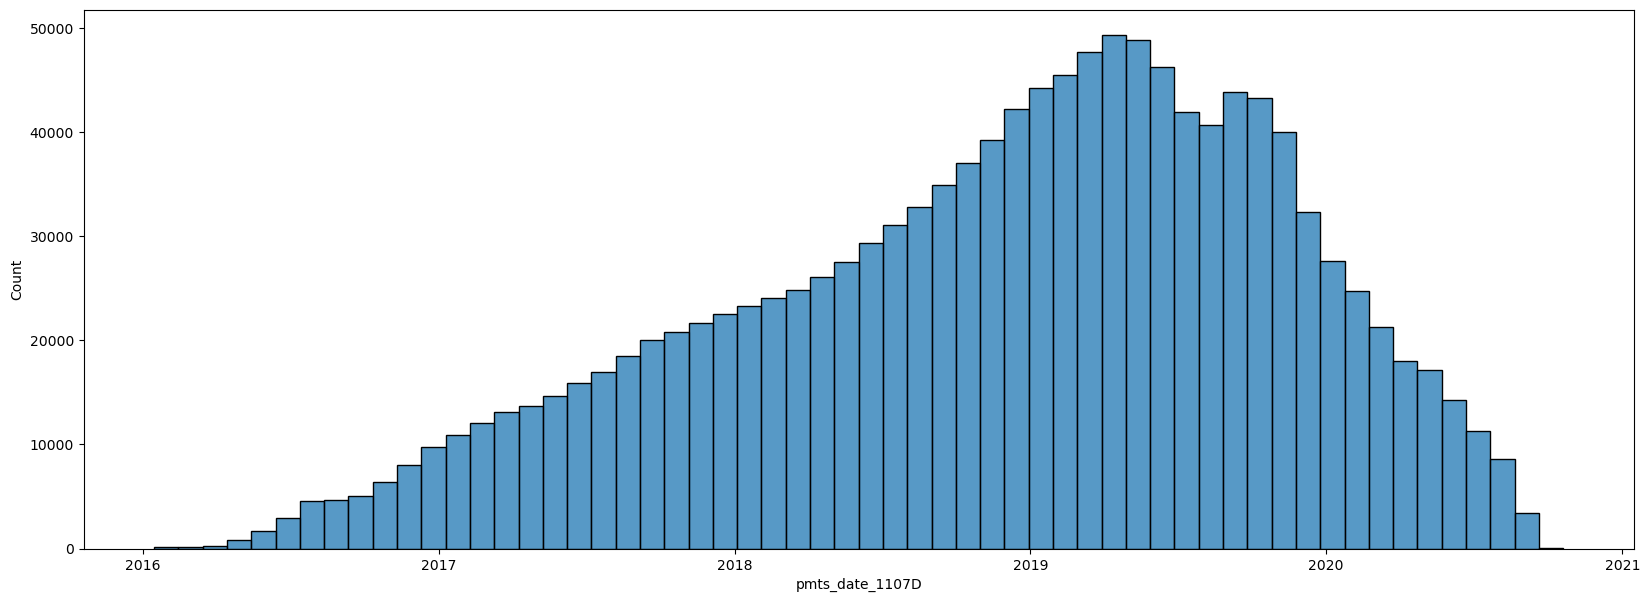

In [33]:
# 데이터 분포(datetime64로 변환 후 분석)
x_dt = pd.to_datetime(x)
x_dt = x_dt.sort_values()
x_dt

plt.figure(figsize=(20, 7))
sns.histplot(data=x_dt, binwidth=30)

In [34]:
# 결측치 여부
x.isna().value_counts()

pmts_date_1107D
False    1286755
Name: count, dtype: int64

##### (3) <b>pmts_dpdvalue_108P</b>: 활성 계약에 대한 연체 금액(num_group1 - existing contract, num_group2 - payment)<br>
&nbsp;&nbsp;&nbsp;- <b>데이터 타입<span style="font-size:16px;">(갯수)</span></b>: float64<span style="font-size:16px;">(1,281,394개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>최빈 데이터<span style="font-size:16px;">(비율)</span></b>: 0.0<span style="font-size:16px;">(약 88.7%)</span><br>
&nbsp;&nbsp;&nbsp;- <b>결측치 비율</b>: 약 0.4%<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange;">→ 단순 null?</span><br>
&nbsp;&nbsp;&nbsp;- <b>기타 논의/의문점</b>:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;① 고액 연체자들의 특징에는 어떤 게 있을까?<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange;">→ 얼마를 기준으로 <b>고액 연체자</b>라고 정의하면 좋을까요?</span><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;② <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;③ <br>

In [35]:
# 데이터 타입(갯수)
x = credit_bureau_b_2["pmts_dpdvalue_108P"]
x.dtype, x.count()

(dtype('float64'), 1281394)

In [36]:
# 최빈 데이터(비율)
x.value_counts(ascending=False, normalize=True)

pmts_dpdvalue_108P
0.0         8.873399e-01
4500.0      3.262072e-04
13500.0     2.481672e-04
9000.0      2.411436e-04
1.0         2.239748e-04
                ...     
108415.0    7.804001e-07
79500.0     7.804001e-07
29073.0     7.804001e-07
30851.0     7.804001e-07
128426.0    7.804001e-07
Name: proportion, Length: 62861, dtype: float64

In [37]:
# 결측치 비율
x.isna().value_counts(normalize=True)

pmts_dpdvalue_108P
False    0.995834
True     0.004166
Name: proportion, dtype: float64

##### (4) <b>pmts_pmtsoverdue_635A</b>: 연체가 존재하는 활성 계약<br>
&nbsp;&nbsp;&nbsp;- <b>데이터 타입 및 갯수</b>: float64<span style="font-size:16px;">(1,281,394개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>최빈 데이터 및 비율</b>: 0.0<span style="font-size:16px;">(약 88.7%)</span><br>
&nbsp;&nbsp;&nbsp;- <b>결측치 비율</b>: 0.4%<br>
&nbsp;&nbsp;&nbsp;- <b>기타 논의/의문점</b>:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;① <b>pmts_dpdvalue_108P</b>와 무슨 차이가 있는 것일까요...?<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;② 이 값이 0이면 무연체자로 볼 수 있을 듯한데 <b>null이면 뭐라고 해석하면 좋을까요?</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;③ 

In [38]:
# 데이터 타입 & 갯수
x = credit_bureau_b_2["pmts_pmtsoverdue_635A"]
x.dtype, x.count()

(dtype('float64'), 1281394)

In [39]:
# 최빈 데이터 및 해당 데이터의 비율
x.value_counts(ascending=False, normalize=True)

pmts_pmtsoverdue_635A
0.00000      8.872447e-01
0.20000      1.124010e-02
0.40000      4.193870e-03
0.80000      4.012817e-03
0.60000      3.649931e-03
                 ...     
474.60000    7.804001e-07
511.00000    7.804001e-07
737.80000    7.804001e-07
788.60004    7.804001e-07
674.00000    7.804001e-07
Name: proportion, Length: 4163, dtype: float64

In [40]:
# 결측치 여부
x.isna().value_counts(normalize=True)

pmts_pmtsoverdue_635A
False    0.995834
True     0.004166
Name: proportion, dtype: float64

#### 03\. debitcard_1<br>

&nbsp;&nbsp;1\) Column별 내용<span style="font-size:16px;">(추정)</span><br>
&nbsp;(1) <b>last180dayaveragebalance_704A</b>: 최근 180일 동안 직불카드의 평균 잔액<span style="font-size:16px" title="Average balance on debit card in the last 180 days">(원문)</span><br>
&nbsp;(2) <b>last180dayturnover_1134A</b>: 최근 180일 동안 직불카드의 평균 출금액<span style="font-size:16px" title="Debit card's turnover within the last 180 days">(원문)</span><br>
&nbsp;(3) <b>last30dayturnover_651A</b>: 최근 30일 동안 직불카드의 평균 출금액<span style="font-size:16px" title="Debit card turnover for the last 30 days">(원문)</span><br>
&nbsp;(4) <b>openingdate_857D</b>: 직불 카드 최초 발급일<span style="font-size:16px" title="Debit card opening date">(원문)</span>

In [41]:
debitcard_1 = pd.read_parquet("Datas/parquet_files/train/train_debitcard_1.parquet")
debitcard_1

,case_id,last180dayaveragebalance_704A,last180dayturnover_1134A,last30dayturnover_651A,num_group1,openingdate_857D
0,225,NaN,NaN,NaN,0,2016-08-16
1,331,NaN,NaN,NaN,0,2015-03-19
2,358,NaN,NaN,NaN,0,2014-09-02
3,390,NaN,NaN,NaN,0,2014-07-23
4,390,NaN,NaN,NaN,2,2016-06-08
...,...,...,...,...,...,...
157297,2703430,NaN,NaN,NaN,8,2016-11-26
157298,2703430,NaN,NaN,NaN,2,2014-02-14
157299,2703439,NaN,NaN,NaN,0,2016-11-25
157300,2703453,NaN,NaN,NaN,1,2015-05-29


&nbsp;&nbsp;2\) 파일 전체에서 관찰되는 특징 및 논의점<br>
&nbsp;(1) 직불카드의 평균 금액에 관련된 컬럼들이 null 값 비율이 매우 높음<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange;">→ null인 사람들은 직불카드를 사용하지 않는다는 뜻일까?</span><br>
&nbsp;(2) last180dayturnover_1134A, last30dayturnover_651A 컬럼의 null count가 같음<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange;">→ 단순 데이터 수집 실수로 인한 null은 아닌 듯...?</span><br>
&nbsp;(3) 카드 발급 데이터는 많은데 평균 잔액 데이터는 훨씬 적음<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange;">→ 왜 그럴까?<br>

In [42]:
debitcard_1.info(memory_usage="deep", show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157302 entries, 0 to 157301
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   case_id                        157302 non-null  int64  
 1   last180dayaveragebalance_704A  12216 non-null   float64
 2   last180dayturnover_1134A       11081 non-null   float64
 3   last30dayturnover_651A         11081 non-null   float64
 4   num_group1                     157302 non-null  int64  
 5   openingdate_857D               144591 non-null  object 
dtypes: float64(3), int64(2), object(1)
memory usage: 15.5 MB


3\) Column별로 관찰되는 특징

##### (1) <b>case_id</b>
&nbsp;&nbsp;&nbsp;- <b>데이터 타입<span style="font-size:16px;">(갯수)</span></b>: int64<span style="font-size:16px;">(157,302개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>최빈 데이터<span style="font-size:16px;">(갯수)</span></b>: 1377353<span style="font-size:16px;">(66회)</span><br>
&nbsp;&nbsp;&nbsp;- <b>결측치 여부</b>: X<br>
&nbsp;&nbsp;&nbsp;- <b>고유 데이터 갯수</b>: 111,772명<br>
&nbsp;&nbsp;&nbsp;- <b>기타 논의/의문점</b>:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;① <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;② <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;③ 

In [43]:
# 데이터 타입(갯수)
x = debitcard_1["case_id"]
x.dtype, x.count()

(dtype('int64'), 157302)

In [44]:
# 최빈 데이터(갯수)
x.value_counts(ascending=False)

case_id
1377353    66
1494474    33
151842     32
246503     32
783268     32
           ..
1396880     1
1396877     1
1396864     1
1396862     1
1570466     1
Name: count, Length: 111772, dtype: int64

In [45]:
# 결측치 여부
x.isna().value_counts()

case_id
False    157302
Name: count, dtype: int64

In [46]:
# 고유 데이터 갯수
x.nunique()

111772

##### (2) <b>last180dayaveragebalance_704A</b>: 최근 180일 동안 직불카드의 평균 잔액<br>
&nbsp;&nbsp;&nbsp;- <b>데이터 타입<span style="font-size:16px;">(갯수)</span></b>: float64<span style="font-size:16px;">(12,216개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>최빈 데이터<span style="font-size:16px;">(비율)</span></b>: 0.0<span style="font-size:16px;">(약 65.8%)</span><br>
&nbsp;&nbsp;&nbsp;- <b>데이터 분포</b>: <span style="font-size:16px;">(하단 셀 참고)</span><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange;">→ 매달 15일이 정기 결제일로 보임</span><br>
&nbsp;&nbsp;&nbsp;- <b>결측치 여부</b>: X<br>
&nbsp;&nbsp;&nbsp;- <b>기타 논의/의문점</b>:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;① 2019년 4월경부터 쭉 데이터가 줄어드는데 이것이 무엇 때문일까요?<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;② 평균 잔액이 0인 통장이 inactive account라면, 이유가 뭘까요?<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;③ 

In [47]:
# 데이터 타입(갯수)
x = debitcard_1["last180dayaveragebalance_704A"]
x.dtype, x.count()

(dtype('float64'), 12216)

In [48]:
# 최빈 데이터(비율)
x.value_counts(ascending=False, normalize=True)

last180dayaveragebalance_704A
0.0000       0.658972
6.0000       0.004257
0.0800       0.003847
0.1200       0.003766
0.1600       0.002947
               ...   
274.5640     0.000082
4770.3490    0.000082
2775.8760    0.000082
7336.2783    0.000082
1.8800       0.000082
Name: proportion, Length: 2495, dtype: float64

<Axes: xlabel='last180dayaveragebalance_704A', ylabel='Density'>

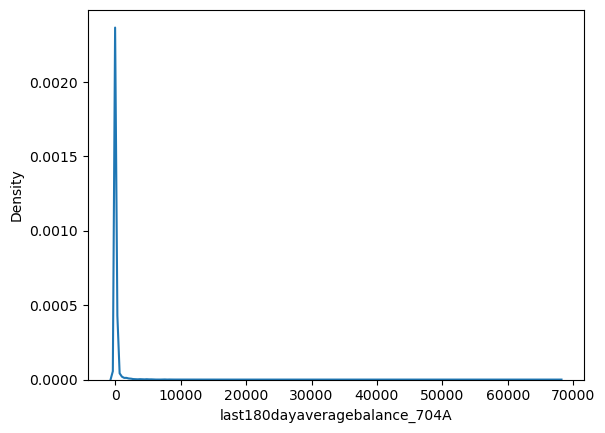

In [49]:
# 데이터 분포
sns.kdeplot(x)

In [50]:
# 결측치 여부
x.isna().value_counts()

last180dayaveragebalance_704A
True     145086
False     12216
Name: count, dtype: int64

##### (3) <b>last180dayturnover_1134A</b>: 최근 180일 동안 직불카드의 평균 출금액<br>
&nbsp;&nbsp;&nbsp;- <b>데이터 타입<span style="font-size:16px;">(갯수)</span></b>: float64<span style="font-size:16px;">(11,081개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>최빈 데이터<span style="font-size:16px;">(갯수)</span></b>: 60,000.0<span style="font-size:16px;">(650개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>데이터 분포</b>: 60,000에서 갑자기 최대 비율로 급증했다가 하락함<span style="font-size:16px;">(하단 셀 참고)</span><br>
&nbsp;&nbsp;&nbsp;- <b>결측치 비율</b>: 약 0.4%<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange;">→ 단순 null?</span><br>
&nbsp;&nbsp;&nbsp;- <b>기타 논의/의문점</b>:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;① <b>고액 연체자들의 특징</b>에는 어떤 게 있을까요?<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;② (단위는 모르지만) 계속 거의 없다가 60,000부터 연체자 수가 많이 분포하는 이유?<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange;">→ 가설 1: 60,000까지는 변제/경감해 주는 프로그램이 있다?</span><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange;">→ 가설 2: 60,000부터 이율이 확 뛴다?</span><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;③ <br>

In [51]:
# 데이터 타입(갯수)
x = debitcard_1["last180dayturnover_1134A"]
x.dtype, x.count()

(dtype('float64'), 11081)

In [52]:
# 최빈 데이터(갯수)
x.value_counts(ascending=False)

last180dayturnover_1134A
60000.000     650
100000.000    574
20000.000     474
40000.000     325
30000.000     302
             ... 
8058.000        1
0.116           1
778.240         1
89991.000       1
12607.400       1
Name: count, Length: 2581, dtype: int64

<Axes: xlabel='last180dayturnover_1134A', ylabel='Density'>

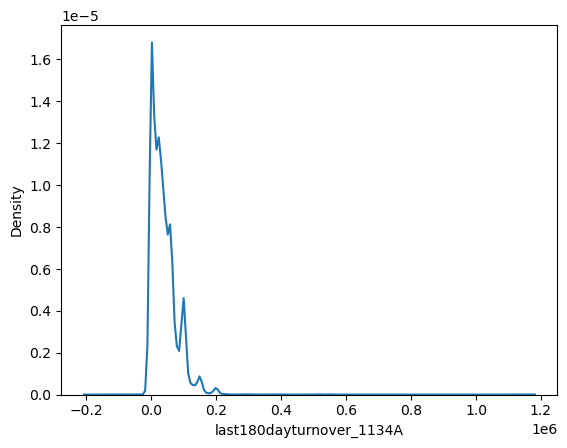

In [53]:
# 데이터 분포
sns.kdeplot(x)

In [54]:
# 결측치 비율
x.isna().value_counts(normalize=True)

last180dayturnover_1134A
True     0.929556
False    0.070444
Name: proportion, dtype: float64

##### (4) <b>last30dayturnover_651A</b>: 최근 30일 동안 직불카드의 평균 출금액<br>
&nbsp;&nbsp;&nbsp;- <b>데이터 타입<span style="font-size:16px;">(갯수)</span></b>: float64<span style="font-size:16px;">(11,081개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>최빈 데이터<span style="font-size:16px;">(비율)</span></b>: 0.0<span style="font-size:16px;">(약 88.5%)</span><br>
&nbsp;&nbsp;&nbsp;- <b>데이터 분포</b>: 0.0을 중심으로 정규분포를 띄는 걸로 보임<span style="font-size:16px;">(하단 셀 참고)</span><br>
&nbsp;&nbsp;&nbsp;- <b>결측치 비율</b>: 약 7%<br>
&nbsp;&nbsp;&nbsp;- <b>기타 논의/의문점</b>:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;① <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;② <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;③ 

In [55]:
# 데이터 타입(갯수)
x = debitcard_1["last30dayturnover_651A"]
x.dtype, x.count()

(dtype('float64'), 11081)

In [56]:
# 최빈 데이터(비율)
x.value_counts(ascending=False, normalize=True)

last30dayturnover_651A
0.0         0.885119
100000.0    0.006317
60000.0     0.004963
34000.0     0.003339
20000.0     0.002978
              ...   
22100.0     0.000090
37819.0     0.000090
29997.0     0.000090
17984.6     0.000090
23800.0     0.000090
Name: proportion, Length: 482, dtype: float64

<Axes: xlabel='last30dayturnover_651A', ylabel='Density'>

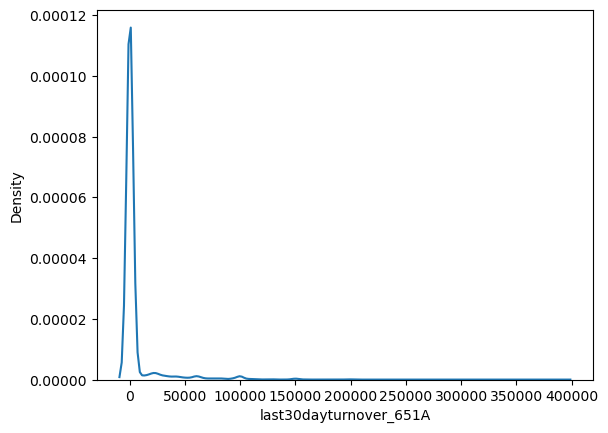

In [57]:
# 데이터 분포
sns.kdeplot(x)

In [58]:
# 결측치 비율
x.isna().value_counts(normalize=True)

last30dayturnover_651A
True     0.929556
False    0.070444
Name: proportion, dtype: float64

##### (5) <b>openingdate_857D</b>: 직불 카드 최초 발급일<br>
&nbsp;&nbsp;&nbsp;- <b>데이터 타입<span style="font-size:16px;">(갯수)</span></b>: object<span style="font-size:16px;">(144,591개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>최빈 데이터<span style="font-size:16px;">(갯수)</span></b>: 2014-07-11<span style="font-size:16px;">(368개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>데이터 분포<span style="font-size:16px;">(datetime64로 변환 후 확인)</span></b>: <span style="font-size:16px;">(하단 셀 참고)</span><br>
&nbsp;&nbsp;&nbsp;- <b>결측치 비율</b>: 약 8.1%<br>
&nbsp;&nbsp;&nbsp;- <b>기타 논의/의문점</b>:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;① <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;② <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;③ 

In [59]:
# 데이터 타입(갯수)
x = debitcard_1["openingdate_857D"]
x.dtype, x.count()

(dtype('O'), 144591)

In [60]:
# 최빈 데이터(갯수)
x.value_counts(ascending=False)

openingdate_857D
2014-07-11    368
2014-04-11    306
2014-03-28    304
2014-04-09    301
2013-12-26    301
             ... 
2003-09-30      1
2006-12-24      1
2005-01-12      1
2001-11-19      1
2017-04-23      1
Name: count, Length: 1578, dtype: int64

<Axes: xlabel='openingdate_857D', ylabel='Count'>

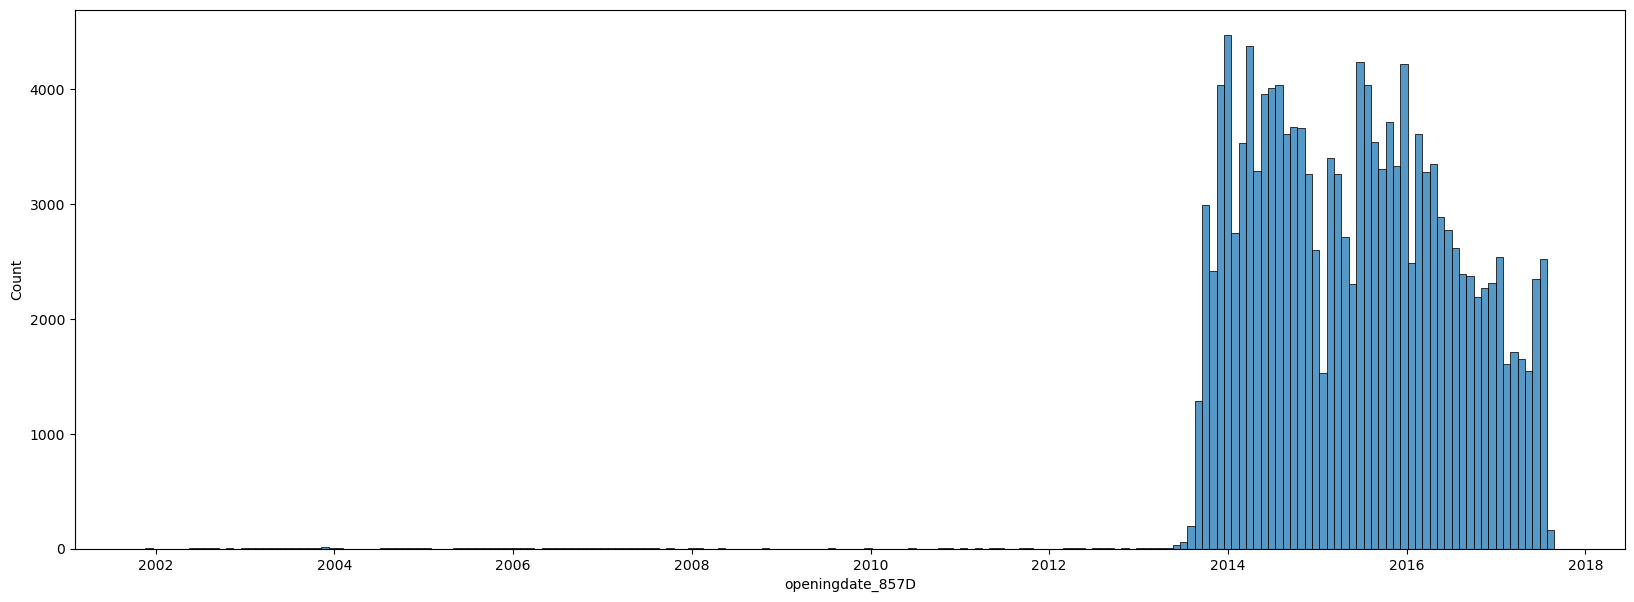

In [61]:
# 데이터 분포
x_dt = pd.to_datetime(x)
x_dt = x_dt.sort_values()
x_dt

plt.figure(figsize=(20, 7))
sns.histplot(data=x_dt, binwidth=30)

In [62]:
# 결측치 비율
x.isna().value_counts(normalize=True)

openingdate_857D
False    0.919194
True     0.080806
Name: proportion, dtype: float64

#### 04\. deposit_1<br>

&nbsp;&nbsp;1\) Column별 내용<span style="font-size:16px;">(추정)</span><br>
&nbsp;(1) <b>amount_416A</b>: 계좌 잔액<span style="font-size:16px" title="Deposit amount">(원문)</span><br>
&nbsp;(2) <b>contractenddate_991D</b>: 대출 상환 만기일<span style="font-size:16px" title="End date of deposit contract">(원문)</span><br>
&nbsp;(3) <b>openingdate_313D</b>: 대출 계좌 개설일<span style="font-size:16px" title="Deposit account opening date">(원문)</span>

In [5]:
deposit_1 = pd.read_parquet("Datas/parquet_files/train/train_deposit_1.parquet")
deposit_1

,case_id,amount_416A,contractenddate_991D,num_group1,openingdate_313D
0,225,0.00000,None,0,2016-08-16
1,331,260.37400,2018-03-18,0,2015-03-19
2,358,0.00000,None,0,2014-09-02
3,390,211748.53000,2017-07-22,0,2014-07-23
4,390,223.68001,None,2,2016-06-08
...,...,...,...,...,...
145081,2703430,22918.00600,None,8,2016-11-26
145082,2703430,0.00000,None,2,2014-02-14
145083,2703439,219.98401,None,0,2016-11-25
145084,2703453,44916.64500,2018-05-28,1,2015-05-29


&nbsp;&nbsp;2\) 파일 전체에서 관찰되는 특징 및 논의점<br>
&nbsp;(1) contractenddate_991D 컬럼에서 null이 다수 발생함<br>
&nbsp;(2) contractenddate_991D, openingdate_313D 컬럼의 dtype은 object이므로 datetime64로 변환이 필요해 보임<br>
&nbsp;(3) 대출 계좌 개설 건수는 145,086건인데 대출 상환 만기일 정보는 65,404건임<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange;">→ 약 54.9%의 사람들이 대출을 제때 갚지 못했다는 것일까?</span>

In [64]:
deposit_1.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145086 entries, 0 to 145085
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   case_id               145086 non-null  int64  
 1   amount_416A           145086 non-null  float64
 2   contractenddate_991D  65404 non-null   object 
 3   num_group1            145086 non-null  int64  
 4   openingdate_313D      145086 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 18.6 MB


##### &nbsp;(1) <b>case_id</b><br>
&nbsp;&nbsp;&nbsp;- <b>데이터 타입</b><span style="font-size:16px;">(갯수)</span>: int64<span style="font-size:16px;">(145,086개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>최빈 데이터</b><span style="font-size:16px;">(갯수)</span>: 1377353<span style="font-size:16px;">(65회)</span><br>
&nbsp;&nbsp;&nbsp;- <b>결측치 여부</b>: X<br>
&nbsp;&nbsp;&nbsp;- <b>데이터 분포<span style="font-size:16px;">(폐기)</span></b>: 다른 옵션과 함께 봐야 할 것으로 생각됨<span style="font-size:16px;">(하단 셀 참고)</span><br>
&nbsp;&nbsp;&nbsp;- <b>고유 데이터 갯수</b>: 105,111명<br>
&nbsp;&nbsp;&nbsp;- <b>기타 논의/의문점</b>:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;① <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;② <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;③ 

In [4]:
# 데이터 타입(갯수)
x = deposit_1["case_id"]
x.dtype, x.count()

(dtype('int64'), 145086)

In [98]:
# 최빈 데이터(갯수)
x.value_counts(ascending=False)

case_id
1377353    65
1306349    32
783268     32
151842     31
246503     31
           ..
1386264     1
1386242     1
1386239     1
1386238     1
1567492     1
Name: count, Length: 105111, dtype: int64

<Axes: xlabel='case_id', ylabel='Density'>

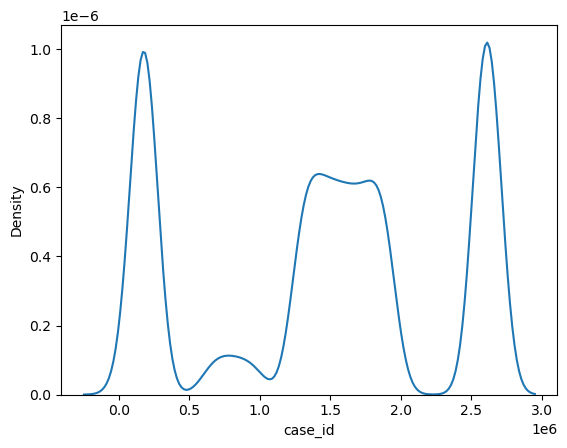

In [5]:
# 데이터 분포
sns.kdeplot(x)

In [67]:
# 결측치 여부
x.isna().value_counts()

case_id
False    145086
Name: count, dtype: int64

In [68]:
# nunique
x.nunique()

105111

##### &nbsp;(2) <b>amount_416A</b>: 대출금의 양<br>
&nbsp;&nbsp;&nbsp;- <b>데이터 타입</b><span style="font-size:16px;">(갯수)</span>: float64<span style="font-size:16px;">(145,086개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>최솟값/최댓값</b>: 12,213,286/-40,000<br>
&nbsp;&nbsp;&nbsp;- <b>최빈 데이터</b><span style="font-size:16px;">(비율)</span>: 0.0<span style="font-size:16px;">(40.6%)</span><br>
&nbsp;&nbsp;&nbsp;- <b>데이터 분포</b>: 0을 중심으로 정규분포처럼 보임<span style="font-size:16px;">(하단 셀 참고)</span><br>
&nbsp;&nbsp;&nbsp;- <b>결측치 여부</b>: X<br>
&nbsp;&nbsp;&nbsp;- <b>기타 논의/의문점</b>:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;① 대출금의 양이 음수인 건 어떻게 이해해야 하는 걸까요?<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;② <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;③ 

In [7]:
# 데이터 타입(갯수)
x = deposit_1["amount_416A"]
x.dtype, x.count()

(dtype('float64'), 145086)

In [100]:
# 최솟값/최댓값
x.max(), x.min()

(12213286.0, -40000.0)

In [101]:
# 최빈 데이터(비율)
x.value_counts(ascending=False, normalize=True)

amount_416A
0.00000        0.406607
202.00800      0.006520
204.04001      0.005397
204.03801      0.004797
202.00601      0.004218
                 ...   
891.15000      0.000007
14831.34400    0.000007
1379.62600     0.000007
544.98200      0.000007
528.28200      0.000007
Name: proportion, Length: 40724, dtype: float64

<Axes: xlabel='amount_416A', ylabel='Density'>

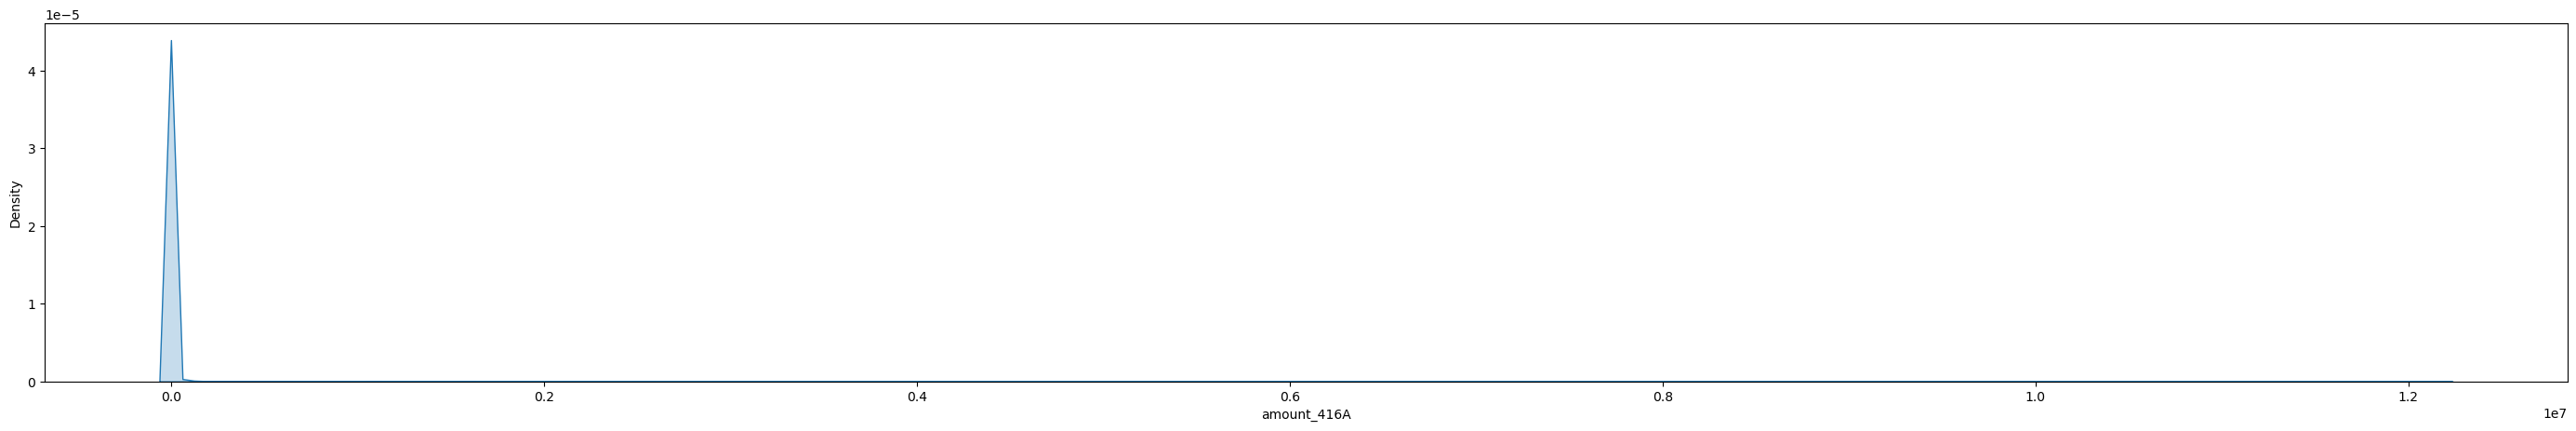

In [11]:
# 데이터 분포
plt.figure(figsize=(35, 5))
sns.kdeplot(data=x, fill=True)

In [72]:
# 결측치 여부
x.isna().value_counts()

amount_416A
False    145086
Name: count, dtype: int64

In [74]:
# 고유 데이터 갯수
x.nunique()

40724

##### &nbsp;(3) <b>contractenddate_991D</b>: 대출 상환 만기일<br>
&nbsp;&nbsp;&nbsp;- <b>데이터 타입</b><span style="font-size:16px;">(갯수)</span>: object<span style="font-size:16px;">(65,404개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>최빈 데이터</b><span style="font-size:16px;">(갯수)</span>: 2017-08-03<span style="font-size:16px;">(295개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>데이터 분포<span style="font-size:16px;">(datetime64로 변환 후 분석)</span></b>: 2018년을 중심으로 몰려 있음<span style="font-size:16px;">(하단 셀 참고)</span><br>
&nbsp;&nbsp;&nbsp;- <b>결측치 비율</b>: 약 54.9%<br>
&nbsp;&nbsp;&nbsp;- <b>기타 논의/의문점</b>:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;① 사람들마다의 대출 기간이 비슷하다면 언제쯤 대출이 많이 이루어지는지 알 수 있지 않을까요?<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;② <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;③ 

In [6]:
# 데이터 타입(갯수)
x = deposit_1["contractenddate_991D"]
x.dtype, x.count()

(dtype('O'), 65404)

In [7]:
# 최빈 데이터(개수)
x.value_counts(ascending=False)

contractenddate_991D
2017-08-03    295
2017-12-31    293
2017-09-01    292
2017-09-08    282
2017-12-23    280
             ... 
2016-01-16      1
2014-03-19      1
2008-06-21      1
2008-04-05      1
2016-11-20      1
Name: count, Length: 1524, dtype: int64

<Axes: xlabel='contractenddate_991D', ylabel='Count'>

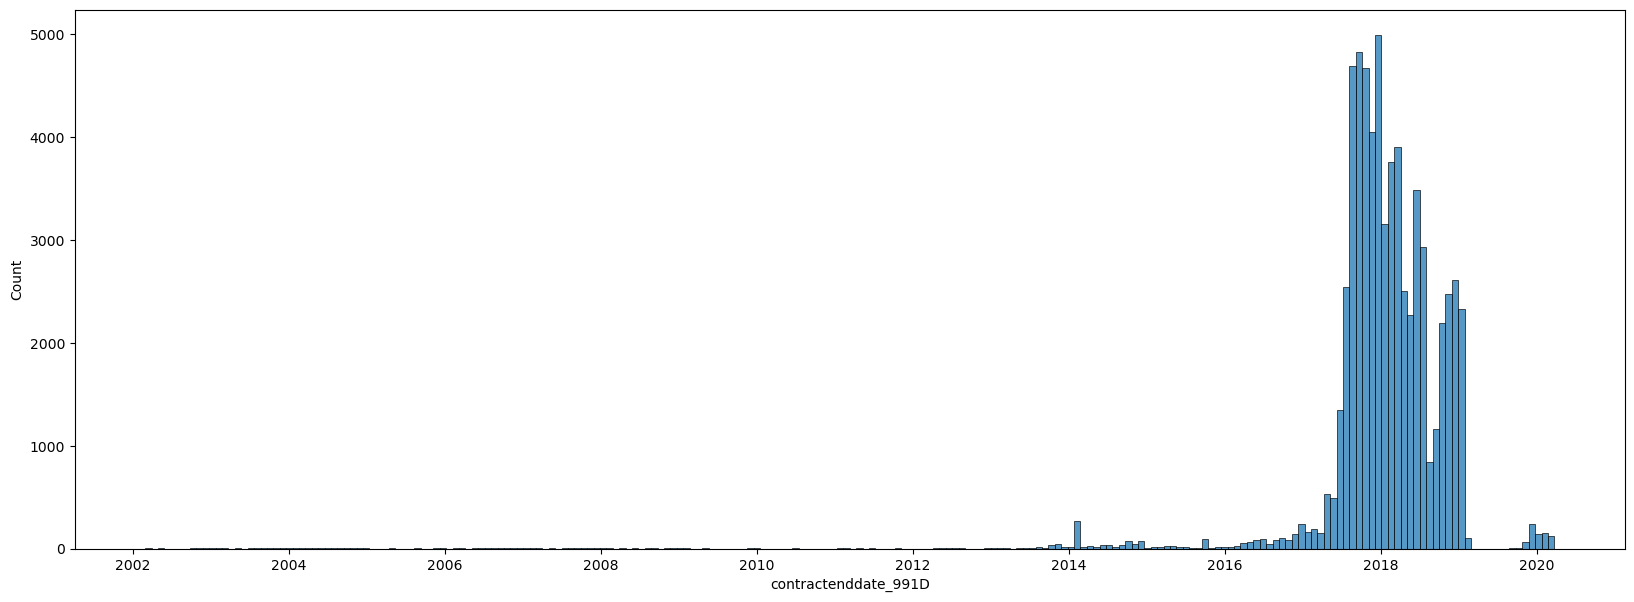

In [8]:
# 데이터 분포(datetime64로 변환 후 분석)
x_dt = pd.to_datetime(x)
x_dt = x_dt.sort_values()
x_dt

plt.figure(figsize=(20, 7))
sns.histplot(data=x_dt, binwidth=30)

In [77]:
# 결측치 여부
x.isna().value_counts(normalize=True)

contractenddate_991D
True     0.549205
False    0.450795
Name: proportion, dtype: float64

In [79]:
# 고유 데이터 갯수
x.nunique()

1524

##### &nbsp;(4) <b>openingdate_313D</b>: 대출|예금 계좌 개설일<br>
&nbsp;&nbsp;&nbsp;- <b>데이터 타입</b><span style="font-size:16px;">(갯수)</span>: object<span style="font-size:16px;">(145,086개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>최빈 데이터</b><span style="font-size:16px;">(갯수)</span>: 2014-07-11<span style="font-size:16px;">(368개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>데이터 분포<span style="font-size:16px;">(datetime64로 변환 후 분석)</span></b>: 2013년 말부터 급증 후 오르락 내리락 하다가 2016년도부터 쭉 하락함<span style="font-size:16px;">(하단 셀 참고)</span><br>
&nbsp;&nbsp;&nbsp;- <b>결측치 여부</b>: X<br>
&nbsp;&nbsp;&nbsp;- <b>기타 논의/의문점</b>:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;① 사람들마다의 대출 기간이 비슷하다면 언제쯤 대출이 많이 이루어지는지 알 수 있지 않을까요?<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;② <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;③ 

In [14]:
# 데이터 타입(갯수)
x = deposit_1["openingdate_313D"]
x.dtype, x.count()

(dtype('O'), 145086)

In [15]:
# 최빈 데이터(갯수)
x.value_counts(ascending=False)

openingdate_313D
2014-07-11    368
2014-04-11    306
2014-03-28    304
2014-04-09    301
2013-12-26    301
             ... 
2007-04-10      1
2006-10-24      1
2004-01-01      1
2003-09-30      1
2017-04-23      1
Name: count, Length: 1579, dtype: int64

<Axes: xlabel='openingdate_313D', ylabel='Count'>

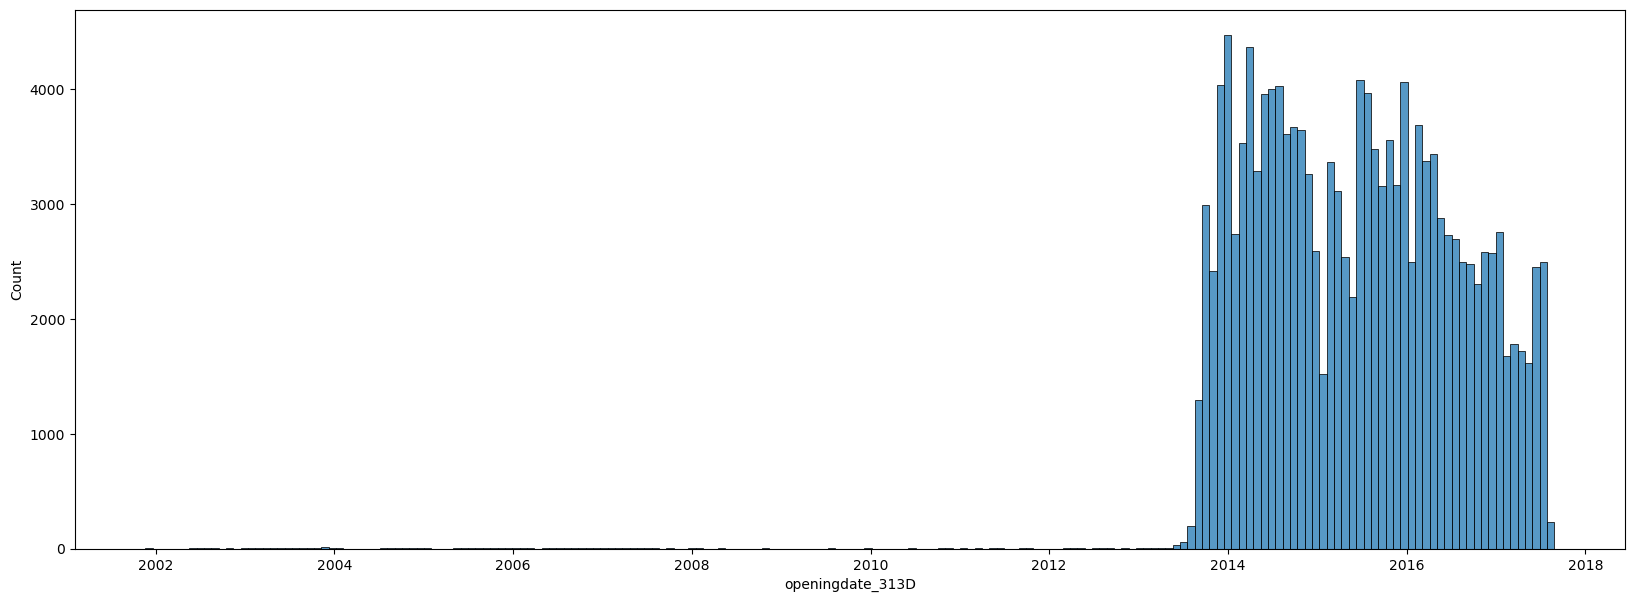

In [12]:
# 데이터 분포(datetime64로 변환 후 분석)
x_dt = pd.to_datetime(x)
x_dt = x_dt.sort_values()
x_dt

plt.figure(figsize=(20, 7))
sns.histplot(data=x_dt, binwidth=30)

In [16]:
# 결측치 여부
x.isna().value_counts(normalize=True)

openingdate_313D
False    1.0
Name: proportion, dtype: float64

#### 05\. person_2<br>

&nbsp;&nbsp;1\) Column별 내용<span style="font-size:16px;">(추정)</span><br>
&nbsp;(1) <b>addres_district_368M</b>: 고객의 거주 구역<span style="font-size:16px" title="District of the person's address">(원문)</span><br>
&nbsp;(2) <b>addres_role_871L</b>: <span style="color:red;">해석불가</span><span style="font-size:16px" title="Role of person's address">(원문)</span><br>
&nbsp;(3) <b>addres_zip_823M</b>: 고객 주소의 우편번호<span style="font-size:16px" title="Zip code of the address">(원문)</span><br>
&nbsp;(4) <b>conts_role_79M</b>: 고객의 연락수단 유형<span style="font-size:16px" title="Type of contact role of a person">(원문)</span><br>
&nbsp;(5) <b>empls_economicalst_849M(num_group1 - person, num_group2 - employment)</b>: 고객의 재정 상태<span style="font-size:16px" title="The economical status of the person">(원문)</span><br>
&nbsp;(6) <b>empls_employedfrom_796D(num_group1 - person, num_group2 - employment)</b>: 고객의 근무 시작 날짜<span style="font-size:16px" title="Start of employment">(원문)</span><br>
&nbsp;(7) <b>empls_employer_name_740M(num_group1 - person, num_group2 - employment)</b>: 고객의 고용주 이름<span style="font-size:16px" title="Employer's name">(원문)</span><br>
&nbsp;(8) <b>relatedpersons_role_762T(num_group1 - person, num_group2 - related person)</b>: <span style="color:red;">해석불가</span><span style="font-size:16px" title="Relationship type of a client's related person">(원문)</span>

In [19]:
person_2 = pd.read_parquet("Datas/parquet_files/train/train_person_2.parquet")
person_2

,case_id,addres_district_368M,addres_role_871L,addres_zip_823M,conts_role_79M,empls_economicalst_849M,empls_employedfrom_796D,empls_employer_name_740M,num_group1,num_group2,relatedpersons_role_762T
0,5,a55475b1,None,a55475b1,a55475b1,a55475b1,None,a55475b1,0,0,None
1,6,P55_110_32,CONTACT,P10_68_40,P38_92_157,P164_110_33,None,a55475b1,0,0,None
2,6,P55_110_32,PERMANENT,P10_68_40,a55475b1,a55475b1,None,a55475b1,0,1,None
3,6,P204_92_178,CONTACT,P65_136_169,P38_92_157,P164_110_33,None,a55475b1,1,0,OTHER_RELATIVE
4,6,P191_109_75,CONTACT,P10_68_40,P7_147_157,a55475b1,None,a55475b1,1,1,OTHER_RELATIVE
...,...,...,...,...,...,...,...,...,...,...,...
1643405,2703450,a55475b1,None,a55475b1,a55475b1,a55475b1,None,a55475b1,0,0,None
1643406,2703451,a55475b1,None,a55475b1,a55475b1,a55475b1,None,a55475b1,0,0,None
1643407,2703452,a55475b1,None,a55475b1,a55475b1,a55475b1,None,a55475b1,0,0,None
1643408,2703453,a55475b1,None,a55475b1,a55475b1,a55475b1,None,a55475b1,0,0,None


&nbsp;&nbsp;2\) 파일 전체에서 관찰되는 특징 및 논의점<br>
&nbsp;(1) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange;">→ ?</span><br>
&nbsp;(2) <br>
&nbsp;(3) <br>

In [20]:
person_2.info(memory_usage="deep", show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643410 entries, 0 to 1643409
Data columns (total 11 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   case_id                   1643410 non-null  int64 
 1   addres_district_368M      1643410 non-null  object
 2   addres_role_871L          67674 non-null    object
 3   addres_zip_823M           1643410 non-null  object
 4   conts_role_79M            1643410 non-null  object
 5   empls_economicalst_849M   1643410 non-null  object
 6   empls_employedfrom_796D   5757 non-null     object
 7   empls_employer_name_740M  1643410 non-null  object
 8   num_group1                1643410 non-null  int64 
 9   num_group2                1643410 non-null  int64 
 10  relatedpersons_role_762T  28726 non-null    object
dtypes: int64(3), object(8)
memory usage: 664.4 MB


In [23]:
person_2["empls_employedfrom_796D"].isna().value_counts(normalize=True)

empls_employedfrom_796D
True     0.996497
False    0.003503
Name: proportion, dtype: float64

3\) Column별로 관찰되는 특징

##### (1) <b>case_id</b>
&nbsp;&nbsp;&nbsp;- <b>데이터 타입<span style="font-size:16px;">(갯수)</span></b>: int64<span style="font-size:16px;">(1,643,410개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>최빈 데이터<span style="font-size:16px;">(갯수)</span></b>: 140528, 1336868<span style="font-size:16px;">(34개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>결측치 여부</b>: X<br>
&nbsp;&nbsp;&nbsp;- <b>고유 데이터 갯수</b>: 1,643,410명<br>
&nbsp;&nbsp;&nbsp;- <b>기타 논의/의문점</b>:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;① <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;② <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;③ 

In [29]:
# 데이터 타입(갯수)
x = person_2["case_id"]
x.dtype, x.count()

(dtype('int64'), 1643410)

In [30]:
# 최빈 데이터(갯수)
x.value_counts(ascending=False)

case_id
140528     34
1336868    34
203731     32
169916     31
259366     31
           ..
959731      1
959730      1
959729      1
959728      1
2703454     1
Name: count, Length: 1435105, dtype: int64

In [31]:
# 결측치 여부
x.isna().value_counts()

case_id
False    1643410
Name: count, dtype: int64

In [32]:
# 고유 데이터 갯수
x.nunique()

1435105

##### (2) <b>addres_district_368M</b>: 고객의 거주 구역<br>
&nbsp;&nbsp;&nbsp;- <b>데이터 타입<span style="font-size:16px;">(갯수)</span></b>: opject<span style="font-size:16px;">(12,216개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>최빈 데이터<span style="font-size:16px;">(비율)</span></b>: a55475b1<span style="font-size:16px;">(약 96.3%)</span><br>
&nbsp;&nbsp;&nbsp;- <b>a55475b1 뺀 최빈 데이터<span style="font-size:16px;">(비율)</span></b>: P125_48_164<span style="font-size:16px;">(약 16.0%)</span><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange;">→ 이것도 해석해 볼 만한 여지가 있지 않을까요?</span><br>
&nbsp;&nbsp;&nbsp;- <b>결측치 여부</b>: X<br>
&nbsp;&nbsp;&nbsp;- <b>고유 데이터 갯수</b>: 508개<br>
&nbsp;&nbsp;&nbsp;- <b>기타 논의/의문점</b>:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;① <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;② <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;③ 

In [33]:
# 데이터 타입(갯수)
x = person_2["addres_district_368M"]
x.dtype, x.count()

(dtype('O'), 1643410)

In [34]:
# 최빈 데이터(비율)
x.value_counts(ascending=False, normalize=True)

addres_district_368M
a55475b1        9.631632e-01
P125_48_164     5.883498e-03
P155_139_77     2.490553e-03
P114_74_190     1.552869e-03
P111_2_12       1.501755e-03
                    ...     
P180_30_168     6.084909e-07
P150_123_175    6.084909e-07
P191_79_125     6.084909e-07
P185_126_64     6.084909e-07
P113_141_141    6.084909e-07
Name: proportion, Length: 508, dtype: float64

In [72]:
# a55475b1 뺀 최빈 데이터
x_nonnull = x[x != "a55475b1"]
x_nonnull.value_counts(ascending=False, normalize=True)

addres_zip_823M
P161_14_174     0.089021
P144_138_111    0.050791
P46_103_143     0.049165
P85_138_173     0.035367
P118_161_181    0.031802
                  ...   
P69_128_178     0.000015
P77_151_173     0.000015
P22_23_6        0.000015
P127_75_187     0.000015
P130_157_145    0.000015
Name: proportion, Length: 2026, dtype: float64

In [53]:
# 결측치 여부
x.isna().value_counts()

addres_district_368M
False    1643410
Name: count, dtype: int64

In [54]:
# 고유 데이터 갯수
x.nunique()

508

##### (3) <b>addres_role_871L</b>: Role of person's address<br>
&nbsp;&nbsp;&nbsp;- <b>데이터 타입<span style="font-size:16px;">(갯수)</span></b>: object<span style="font-size:16px;">(67,674개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>데이터 분포<span style="font-size:16px;">(countplot)</span></b>: 하단 셀 참고<br>
&nbsp;&nbsp;&nbsp;- <b>결측치 비율</b>: 약 95.9%<br>
&nbsp;&nbsp;&nbsp;- <b>기타 논의/의문점</b>:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;① 개인의 상환 능력을 판단하기에는 도움이 안 되는 자료 같음<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;② <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;③ 

In [56]:
# 데이터 타입(갯수)
x = person_2["addres_role_871L"]
x.dtype, x.count()

(dtype('O'), 67674)

<Axes: xlabel='addres_role_871L', ylabel='count'>

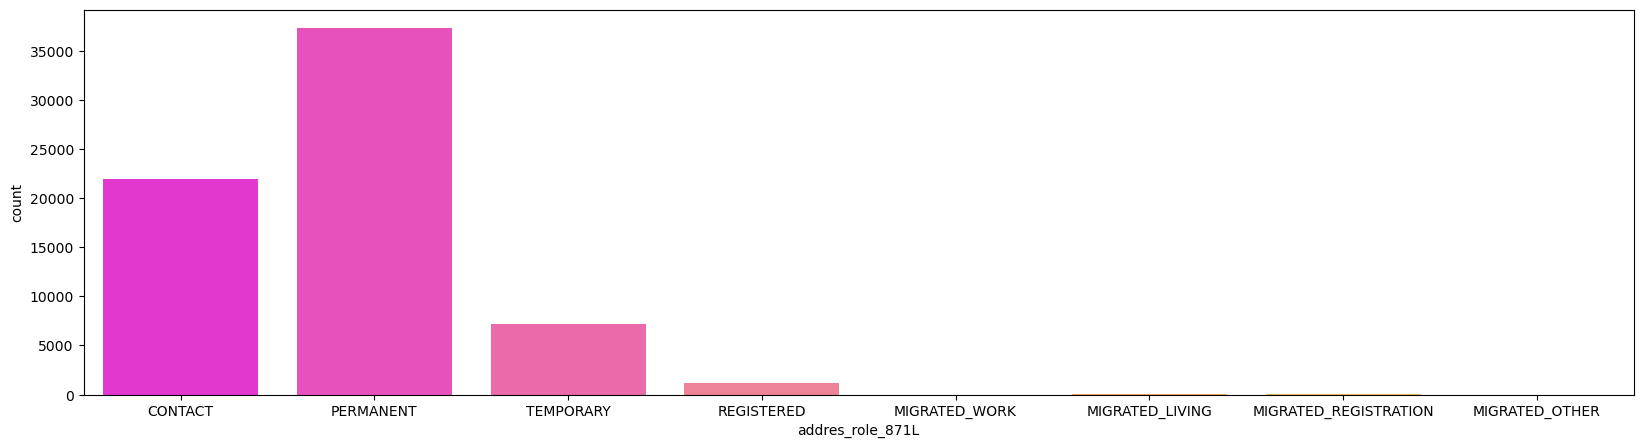

In [67]:
# 데이터 분포(countplot)
plt.figure(figsize=(20, 5))
sns.countplot(data=x, x=x, palette="spring")

In [68]:
# 결측치 비율
x.isna().value_counts(normalize=True)

addres_role_871L
True     0.958821
False    0.041179
Name: proportion, dtype: float64

##### (4) <b>addres_zip_823M</b>: 고객 주소의 우편번호<br>
&nbsp;&nbsp;&nbsp;- <b>데이터 타입<span style="font-size:16px;">(갯수)</span></b>: object<span style="font-size:16px;">(1,643,410개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>최빈 데이터<span style="font-size:16px;">(비율)</span></b>: a55475b1<span style="font-size:16px;">(약 95.9%)</span><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange;">→ 우편번호가 없다는 것은 무엇을 뜻하는 걸까요?</span><br>
&nbsp;&nbsp;&nbsp;- <b>결측치 여부</b>: X<br>
&nbsp;&nbsp;&nbsp;- <b>기타 논의/의문점</b>:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;① 개인의 상환 능력을 판단하기에는 도움이 안 되는 자료 같음<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;② <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;③ 

In [69]:
# 데이터 타입(갯수)
x = person_2["addres_zip_823M"]
x.dtype, x.count()

(dtype('O'), 1643410)

In [70]:
# 최빈 데이터(비율)
x.value_counts(ascending=False, normalize=True)

addres_zip_823M
a55475b1        9.592068e-01
P161_14_174     3.631474e-03
P144_138_111    2.071911e-03
P46_103_143     2.005586e-03
P85_138_173     1.442732e-03
                    ...     
P89_135_161     6.084909e-07
P98_135_175     6.084909e-07
P98_50_168      6.084909e-07
P26_101_80      6.084909e-07
P88_42_171      6.084909e-07
Name: proportion, Length: 2027, dtype: float64

In [73]:
# 결측치 비율
x.isna().value_counts(normalize=True)

addres_zip_823M
False    1.0
Name: proportion, dtype: float64

##### (5) <b>conts_role_79M</b>: 고객의 연락수단 유형<br>
&nbsp;&nbsp;&nbsp;- <b>데이터 타입<span style="font-size:16px;">(갯수)</span></b>: object<span style="font-size:16px;">(144,591개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>결측치 여부</b>: X<br>
&nbsp;&nbsp;&nbsp;- <b>기타 논의/의문점</b>:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;① 개인의 상환 능력을 판단하기에는 도움이 안 되는 자료 같음<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;② <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;③ 

In [76]:
# 데이터 타입(갯수)
x = person_2["conts_role_79M"]
x.dtype, x.count()

(dtype('O'), 1643410)

In [77]:
# 결측치 여부
x.isna().value_counts(normalize=True)

conts_role_79M
False    1.0
Name: proportion, dtype: float64

##### (6) <b>empls_economicalst_849M(num_group1 - person, num_group2 - employment)</b>: 고객의 재정 상태<br>
&nbsp;&nbsp;&nbsp;- <b>데이터 타입<span style="font-size:16px;">(갯수)</span></b>: object<span style="font-size:16px;">(1,643,410개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>a55475b1 뺀 최빈 데이터<span style="font-size:16px;">(비율)</span></b>: P22_131_138<span style="font-size:16px;">(약 37.6%)</span><br>
&nbsp;&nbsp;&nbsp;- <b>a55475b1 뺀 데이터 분포</b>: <span style="font-size:16px;">(하단 셀 참조)</span><br>
&nbsp;&nbsp;&nbsp;- <b>결측치 여부</b>: X<br>
&nbsp;&nbsp;&nbsp;- <b>기타 논의/의문점</b>:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;① 이건 Masking되어 있어도 해석해 볼 가치가 있을 듯...?<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;② <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;③ 

In [81]:
# 데이터 타입(갯수)
x = person_2["empls_economicalst_849M"]
x.dtype, x.count()

(dtype('O'), 1643410)

In [82]:
# a55475b1 뺀 최빈 데이터
x_nonnull = x[x != "a55475b1"]
x_nonnull.value_counts(ascending=False, normalize=True)

empls_economicalst_849M
P22_131_138    0.376557
P164_110_33    0.263994
P28_32_178     0.254449
P148_57_109    0.075675
P112_86_147    0.018929
P191_80_124    0.004611
P7_47_145      0.003195
P164_122_65    0.002467
P82_144_169    0.000121
Name: proportion, dtype: float64

<Axes: xlabel='empls_economicalst_849M', ylabel='count'>

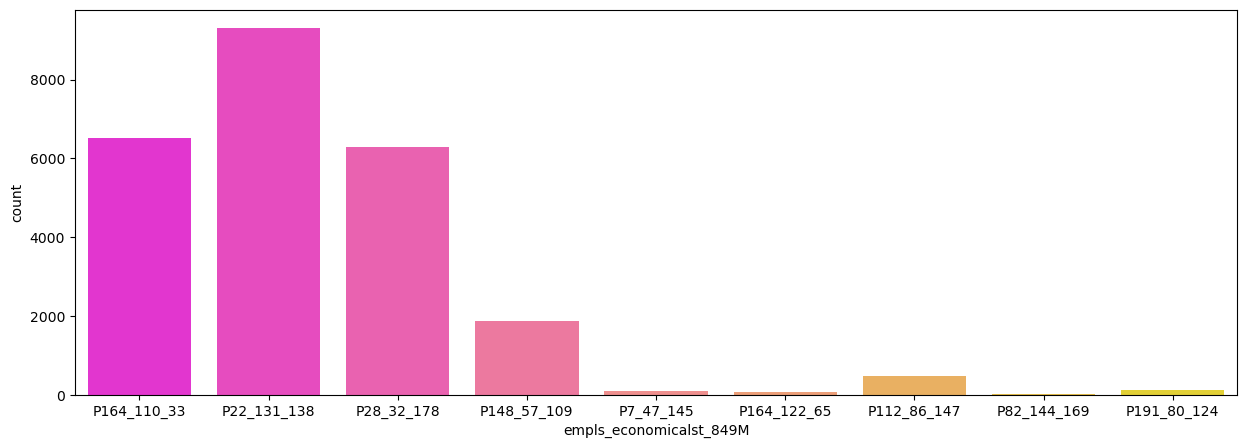

In [85]:
# a55475b1 뺀 데이터 분포
plt.figure(figsize=(15, 5))
sns.countplot(data=x_nonnull, x=x_nonnull, palette="spring")

In [87]:
# 결측치 여부
x.isna().value_counts(normalize=True)

empls_economicalst_849M
False    1.0
Name: proportion, dtype: float64

##### (7) <b>empls_employedfrom_796D(num_group1 - person, num_group2 - employment)</b>: 고객의 근무 시작 날짜<br>
&nbsp;&nbsp;&nbsp;- <b>데이터 타입<span style="font-size:16px;">(갯수)</span></b>: object<span style="font-size:16px;">(5,757개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>최빈 데이터<span style="font-size:16px;">(갯수)</span></b>: 2017-01-15<span style="font-size:16px;">(228개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>데이터 분포<span style="font-size:16px;">(datetime64로 변환 후 확인)</span></b>: 하단 셀 참고<br>
&nbsp;&nbsp;&nbsp;- <b>결측치 비율</b>: 약 99.6%<br>
&nbsp;&nbsp;&nbsp;- <b>기타 논의/의문점</b>:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;① 개인의 상환 능력을 판단하기에는 도움이 안 되는 자료 같음<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;② <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;③ 

In [92]:
# 데이터 타입(갯수)
x = person_2["empls_employedfrom_796D"]
x.dtype, x.count()

(dtype('O'), 5757)

In [93]:
# 최빈 데이터(갯수)
x.value_counts(ascending=False)

empls_employedfrom_796D
2017-01-15    228
2016-01-15    196
2015-01-15    181
2018-01-15    125
2013-01-15    113
             ... 
2014-03-16      1
2017-07-12      1
2019-01-01      1
1989-08-15      1
2013-02-19      1
Name: count, Length: 801, dtype: int64

<Axes: xlabel='empls_employedfrom_796D', ylabel='Count'>

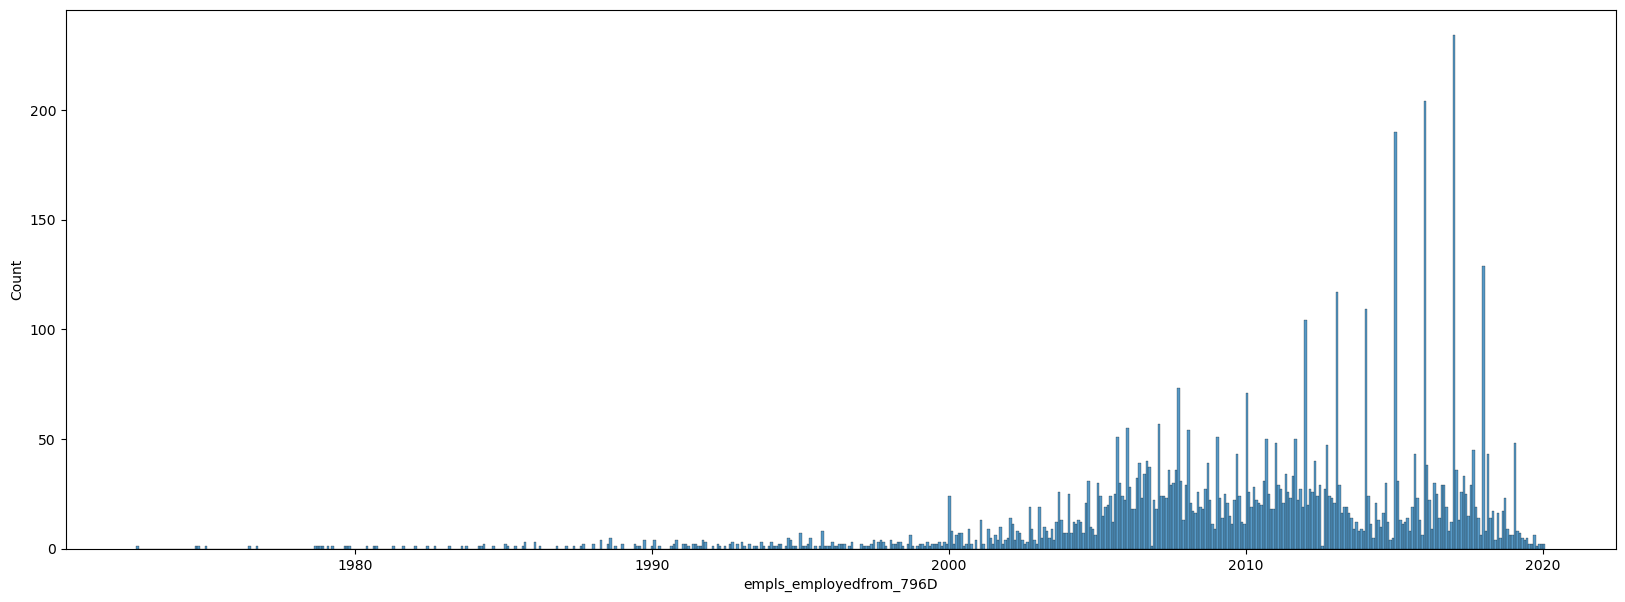

In [90]:
# 데이터 분포
x_dt = pd.to_datetime(x)
x_dt = x_dt.sort_values()
x_dt

plt.figure(figsize=(20, 7))
sns.histplot(data=x_dt, binwidth=30)

In [91]:
# 결측치 비율
x.isna().value_counts(normalize=True)

empls_employedfrom_796D
True     0.996497
False    0.003503
Name: proportion, dtype: float64

##### (8) <b>empls_employer_name_740M(num_group1 - person, num_group2 - employment)</b>: 고객의 고용주 이름<br>
&nbsp;&nbsp;&nbsp;- <b>데이터 타입<span style="font-size:16px;">(갯수)</span></b>: object<span style="font-size:16px;">(1,643,410개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>결측치 여부</b>: X<br>
&nbsp;&nbsp;&nbsp;- <b>기타 논의/의문점</b>:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;① 개인의 상환 능력을 판단하기에는 도움이 안 되는 자료 같음<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;② <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;③ 

In [96]:
# 데이터 타입(갯수)
x = person_2["empls_economicalst_849M"]
x.dtype, x.count()

(dtype('O'), 1643410)

In [98]:
# 결측치 비율
x.isna().value_counts(normalize=True)

empls_economicalst_849M
False    1.0
Name: proportion, dtype: float64

##### (9) <b>relatedpersons_role_762T(num_group1 - person, num_group2 - employment)</b>: Relationship type of a client's related person<br>
&nbsp;&nbsp;&nbsp;- <b>데이터 타입<span style="font-size:16px;">(갯수)</span></b>: object<span style="font-size:16px;">(28,726개)</span><br>
&nbsp;&nbsp;&nbsp;- <b>데이터 분포</b>: object<span style="font-size:16px;">(하단 셀 참조)</span><br>
&nbsp;&nbsp;&nbsp;- <b>결측치 비율</b>: 98.2%<br>
&nbsp;&nbsp;&nbsp;- <b>기타 논의/의문점</b>:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;① 개인의 상환 능력을 판단하기에는 <b>직접적인 도움</b>이 안 되는 자료 같음<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;② <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;③ 

In [99]:
# 데이터 타입(갯수)
x = person_2["relatedpersons_role_762T"]
x.dtype, x.count()

(dtype('O'), 28726)

<Axes: xlabel='relatedpersons_role_762T', ylabel='count'>

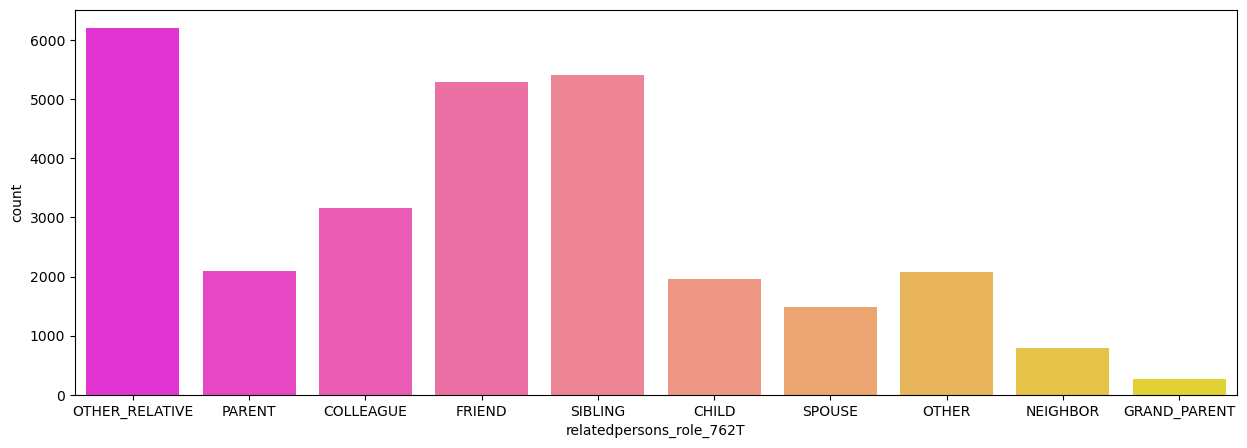

In [105]:
# 데이터 분포
plt.figure(figsize=(15, 5))
sns.countplot(data=x, x=x, palette="spring")

In [101]:
# 결측치 비율
x.isna().value_counts(normalize=True)

relatedpersons_role_762T
True     0.98252
False    0.01748
Name: proportion, dtype: float64

#### 06. 전체 데이터에 대한 의문점

&nbsp;&nbsp;&nbsp;- <span style="color:orange;">Masking된 데이터</span>를 <b><span style="color:orange;">예측에 도움이 되지 않는 데이터</span></b>로, 와 <span style="color:green;">Masking 되지 않은 데이터</span>를 <b><span style="color:green;">예측에 도움이 되는 데이터</span></b>로 생각해도 될까요?